In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [194]:
df = pd.read_pickle('prop_data_12h_4h_1h_up_to_s41.pkl')
df

,rep,exp,start,time_win,max_gap,CC,ants,partition,MOD,DEN,wDEN,DIA,wDIA,RAD,wRAD,DEH,wDEH,CLS
0,13,DEHa,2021-09-12 09:00:00,43200,5,1,177,3,0.277676,0.964368,0.003132,2,0.008075,1,0.004761,7.919433,8876.307392,0.012953
1,13,DEHa,2021-09-12 09:00:00,3600,5,1,177,9,0.503127,0.435927,0.003632,3,0.09807,2,0.054673,33.491666,1290.363806,0.003218
2,13,DEHa,2021-09-12 10:00:00,3600,5,1,177,9,0.582983,0.410118,0.003628,3,0.072419,2,0.042489,30.520181,1602.451913,0.002856
3,13,DEHa,2021-09-12 11:00:00,3600,5,1,177,7,0.41317,0.49801,0.003255,2,0.237292,2,0.171429,32.276024,915.816669,0.006928
4,13,DEHa,2021-09-12 12:00:00,3600,5,1,177,8,0.542923,0.387969,0.002959,2,0.105196,2,0.054731,30.739462,1164.523006,0.004107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,41,DEHa,2021-11-26 20:00:00,3600,5,1,164,8,0.476974,0.409846,0.006354,3,0.06176,2,0.034884,28.4654,2054.789645,0.007649
909,41,DEHa,2021-11-26 09:00:00,14400,5,1,164,6,0.254936,0.791635,0.006158,2,0.019845,1,0.010494,22.577749,5571.026484,0.01242
910,41,DEHa,2021-11-26 13:00:00,14400,5,1,164,6,0.292694,0.770986,0.006207,2,0.019184,1,0.010017,23.786425,5244.993956,0.012868
911,41,DEHa,2021-11-26 17:00:00,14400,5,1,164,4,0.284348,0.784678,0.006233,2,0.013775,1,0.008565,22.518074,6029.43416,0.014563


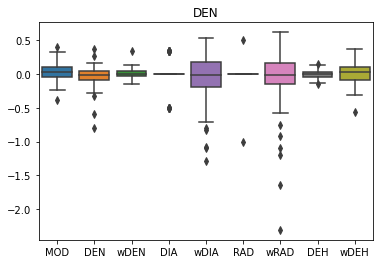

In [199]:
# --------- FILTERING ------------
reps_discarded = [20,41]
exp = 'DEN'
df_filt = df.loc[(df.time_win==3600) & 
            (df.exp.isin([exp+'a',exp+'b'])) & 
           ( ~df.rep.isin(reps_discarded))]



# ---- dataframe of relative difference---- 
p = df_filt.columns[8:]
df_rd = (df_filt[p].diff()/df_filt[p]).iloc[1::2]
df_rd.insert(0,'rep', df_filt.rep.iloc[1::2])
df_rd.insert(1,'exp', [a[0:3] for a in df_filt.exp.iloc[1::2]])
df_rd.insert(2,'start-a', list(df_filt.start.iloc[::2]))
df_rd.insert(3,'start-b', list(df_filt.start.iloc[1::2]))

boxplot = sns.boxplot(data=df_rd[p[:-1]])
fig = plt.title(exp)



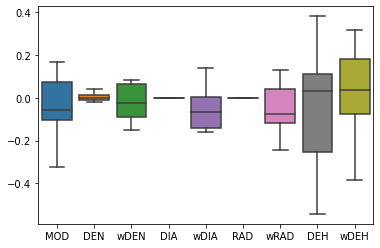

In [179]:
boxplot = sns.boxplot(data=df_rd[p[:-1]])
